# Getting newspaper data from COCA corpus

In [1]:
import pandas as pd
import zipfile
import re
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
# set filepath
COCA = "/Users/rachelker/Documents/UChic MSCAPP/Curriculum/2019-20 Winter/Computational Content Analysis/Project/Data/Davies Corpora/COCA/"
newspapers_path = COCA + 'text_newspaper_lsp.zip'
newspapers_path

'/Users/rachelker/Documents/UChic MSCAPP/Curriculum/2019-20 Winter/Computational Content Analysis/Project/Data/Davies Corpora/COCA/text_newspaper_lsp.zip'

## Getting texts

In [3]:
def get_newspaper_df(newspapers_path, topic_filter):    
    # get all text
    newspapers_data = load_newspapers(newspapers_path)    
    all_news = []
    [all_news.extend(newspapers_data[k]) for k in newspapers_data.keys()]
        
    # load into dataframe
    df = pd.DataFrame(all_news, columns=['text'])
    # get text_ids
    df['text_id'] = df.apply(lambda x: get_textid(x), axis=1)

    df['text'] = df.apply(lambda x: x['text'].decode('utf-8', errors='ignore'), axis=1)
    df = df[df['text'].str.contains(topic_filter)]
    df.set_index('text_id', inplace=True)
    return df

def get_textid(row):
        text = row['text']
        text = text.decode('utf-8', errors='ignore')
        text_id = re.search('(?<=##)[0-9]+', text).group(0)
        return str(text_id)
    
def load_newspapers(newspapers_path):
    newspaper_raw = zipfile.ZipFile(newspapers_path)
    newspaper_data = {}

    for file in newspaper_raw.namelist():
        newspaper_data[file] = []
        with newspaper_raw.open(file) as f:
            i=0
            for line in f:
                #skip first line of every file
                if i==0:
                    i+=1 
                    continue
                newspaper_data[file].append(line)
#    for k in newspaper_data.keys():
#        print("{}: {}".format(k, len(newspaper_data[k])))
    return newspaper_data

In [4]:
newspaper_df = get_newspaper_df(newspapers_path, '')
# total of 57037 articles

In [5]:
# try using 2 different query words - immigra and migra
immigra_newspaper_df = get_newspaper_df(newspapers_path, 'immigra')
migra_newspaper_df = get_newspaper_df(newspapers_path, 'migra')

In [6]:
immigra_newspaper_df
# 3335

text
text_id                                                   
3001109  ##3001109 <p> The people who work behind the p...
3001113  ##3001113 <p> Following are excerpts from a tr...
3001115  ##3001115 <p> It started over some plantains a...
3001128  ##3001128 <p> Sung Soo Kim , a native of South...
3001901  ##3001901 <p> Lucien Paye , head of the O.E.C....
...                                                    ...
4115318  ##4115318 For the second time in a month , the...
4115330  ##4115330 Sen. Scott Brown ( R ) of Massachuse...
4115348  ##4115348 Insights into the minds of Westerner...
4115354  ##4115354 An Obama administration announcement...
4115364  ##4115364 I am the proud son of a hardworking ...

[3335 rows x 1 columns]

In [7]:
migra_newspaper_df
# 4841

text
text_id                                                   
3001109  ##3001109 <p> The people who work behind the p...
3001113  ##3001113 <p> Following are excerpts from a tr...
3001115  ##3001115 <p> It started over some plantains a...
3001128  ##3001128 <p> Sung Soo Kim , a native of South...
3001901  ##3001901 <p> Lucien Paye , head of the O.E.C....
...                                                    ...
4115348  ##4115348 Insights into the minds of Westerner...
4115354  ##4115354 An Obama administration announcement...
4115356  ##4115356 As Syria devolves into what the UN p...
4115364  ##4115364 I am the proud son of a hardworking ...
4115371  ##4115371 A former Indian Army major placed a ...

[4841 rows x 1 columns]

## Getting metadata

In [8]:
def get_news_sources():
    cols = ['text_id', 'word_count', 'year', 'genre', 'subgen', 'source', 'title', 'publication_info']

    zfile = zipfile.ZipFile(COCA + "sources.zip")
    source = []
    for file in zfile.namelist():
        with zfile.open(file) as f:
            for line in f:
                line = line.decode('utf-8', errors='ignore').split("\t")
                if len(line)>4 and line[3] == 'NEWS':
                    print(line)
                    source.append(line)
    
    sources_df = pd.DataFrame(source, columns=cols)
    sources_df.set_index('text_id', inplace=True)
    return sources_df

In [9]:
sources_df = get_news_sources()

['3000001', '1179', '1990', 'NEWS', '141', 'NYTimes', 'Piniella Eager to Put Pinstripes Behind\r\n']
['3000002', '1153', '1990', 'NEWS', '141', 'NYTimes', 'Grand Prix Indoor Circuit Goes Down to the Finish\r\n']
['3000003', '1067', '1990', 'NEWS', '141', 'NYTimes', 'Flamingos, Palms and Silence\r\n']
['3000004', '957', '1990', 'NEWS', '141', 'NYTimes', 'Arbitration List\r\n']
['3000005', '1045', '1990', 'NEWS', '141', 'NYTimes', 'RESULTS PLUS\r\n']
['3000006', '1359', '1990', 'NEWS', '141', 'NYTimes', 'Ready to Be the Slugger of Old\r\n']
['3000007', '1717', '1990', 'NEWS', '141', 'NYTimes', 'Continually Coming Up Empty;The Nets Are Losing Games, Fans, Tempers and Respect\r\n']
['3000008', '1998', '1990', 'NEWS', '141', 'NYTimes', 'VICTORY IN LAKE PLACID;Impossible Dream Plus One Decade\r\n']
['3000009', '2494', '1990', 'NEWS', '141', 'NYTimes', 'A Secluded Indonesian Isle\r\n']
['3000010', '1120', '1990', 'NEWS', '141', 'NYTimes', 'Overtime Favors Knicks\r\n']
['3000011', '2049', '199

['3046496', '1789', '1990', 'NEWS', '135', 'SanFranChron', 'Jazzbeaux Bops Back After Hard Times; Famed DJ, 71, grabs multiple gigs around the Bay Area; ', 'SUNDAY DATEBOOK; Pg. 58\r\n']
['3046497', '2415', '1990', 'NEWS', '140', 'SanFranChron', 'Whoopi Hits Gold Again; ^Ghost^ spirits star into heavenly limelight; ', 'SUNDAY DATEBOOK; Pg. 21\r\n']
['3046498', '4242', '1990', 'NEWS', '135', 'SanFranChron', 'GLIMPSES OF FLEDGING DEMOCRACY; Czechoslavakia^s Velvet Revolution is 1 year old; ', 'THIS WORLD; Pg. 13\r\n']
['3046499', '1757', '1990', 'NEWS', '135', 'SanFranChron', 'ANOTHER VISIT TO THE ORACLE; ', 'THIS WORLD; Pg. 7/Z\r\n']
['3046500', '1456', '1990', 'NEWS', '140', 'SanFranChron', 'New Taste Adventures In the Big Apple; ', 'SUNDAY DATEBOOK; Pg. 17; DINING OUT\r\n']
['3046501', '1217', '1990', 'NEWS', '135', 'SanFranChron', 'Gearing Up <B>for</B> Mozart Bicentennial; ', 'SUNDAY DATEBOOK; Pg. 43; CLASSICAL CDS\r\n']
['3046502', '1456', '1990', 'NEWS', '135', 'SanFranChron', 'Ti

['3026421', '1604', '1991', 'NEWS', '141', 'USAToday', "A sampling of readers'' comments about this week''s series of reports on Race &amp; Sports", 'SPORTS\r\n']
['3032573', '1358', '1991', 'NEWS', '135', 'WashPost', '7 Purported Allied Fliers Interviewed on Iraqi TV', 'FIRST SECTION\r\n']
['3032574', '2550', '1991', 'NEWS', '135', 'WashPost', 'U.S. Claims Iraqi Nuclear Reactors Hit Hard;', 'FIRST SECTION\r\n']
['3032575', '1404', '1991', 'NEWS', '135', 'WashPost', 'U.S. Missiles Knock Down Nine Scuds Over Saudi Cities', 'FIRST SECTION\r\n']
['3032576', '1357', '1991', 'NEWS', '135', 'WashPost', "Do U.S. Anti-Bias Laws Stop at Water''s Edge?;", 'FIRST SECTION\r\n']
['3032577', '1503', '1991', 'NEWS', '135', 'WashPost', 'Strong Support on a Shaky Foundation;', 'FIRST SECTION\r\n']
['3032578', '2220', '1991', 'NEWS', '140', 'WashPost', 'Antidote', 'STYLE\r\n']
['3032579', '1372', '1991', 'NEWS', '140', 'WashPost', 'Pete Williams, Playing It Cool;', 'STYLE\r\n']
['3032580', '1416', '1991

['3033001', '1473', '1992', 'NEWS', '140', 'WashPost', 'The Limited Life of a Political Wife;', 'STYLE\r\n']
['3033002', '1418', '1992', 'NEWS', '140', 'WashPost', '', 'STYLE\r\n']
['3033003', '1624', '1992', 'NEWS', '141', 'WashPost', 'Rise and Shine: 20 Years', 'SPORTS\r\n']
['3033004', '2645', '1992', 'NEWS', '138', 'WashPost', 'NEWS NEAR YOU', 'DISTRICT WEEKLY\r\n']
['3033005', '3258', '1992', 'NEWS', '140', 'WashPost', 'The Quilts That Struck a Nerve;', 'HOME\r\n']
['3033006', '1528', '1992', 'NEWS', '135', 'WashPost', 'Clinton Scores Twin Midwest Victories;', 'FIRST SECTION\r\n']
['3033007', '1631', '1992', 'NEWS', '135', 'WashPost', '3 Cabinet Members Admit Writing Bad Checks in House', 'FIRST SECTION\r\n']
['3033008', '1792', '1992', 'NEWS', '135', 'WashPost', 'Israel Questioning Future Of Military Ties With U.S.', 'FIRST SECTION\r\n']
['3033009', '1408', '1992', 'NEWS', '135', 'WashPost', "Bush Says He''s ''Virtually'' Won Renomination", 'FIRST SECTION\r\n']
['3033010', '1277'

['3026897', '2673', '1993', 'NEWS', '140', 'USAToday', "Calendar of cars: What''s new", 'BONUS\r\n']
['3026898', '1315', '1993', 'NEWS', '140', 'USAToday', "''50s FLASH RETURNS // Automakers go back to the future", 'BONUS\r\n']
['3026899', '1147', '1993', 'NEWS', '139', 'USAToday', 'Du Pont shifts burden onto employees', 'MONEY\r\n']
['3026900', '1307', '1993', 'NEWS', '139', 'USAToday', 'Skeptics forced into market // Moves likely to buoy stocks', 'MONEY\r\n']
['3026901', '1436', '1993', 'NEWS', '139', 'USAToday', '1,000 seek advice from panel of experts', 'MONEY\r\n']
['3026902', '1170', '1993', 'NEWS', '140', 'USAToday', 'A tale of alien-ation // Encounters with a UFO and skeptics', 'LIFE\r\n']
['3026905', '2285', '1993', 'NEWS', '135', 'USAToday', 'ACROSS THE USA: NEWS FROM EVERY STATE', 'NEWS\r\n']
['3026907', '1319', '1993', 'NEWS', '141', 'USAToday', 'Wild weekend to decide final NCAA berths', 'SPORTS\r\n']
['3026910', '1149', '1993', 'NEWS', '139', 'USAToday', 'Loosening lendin

['3013397', '1382', '1994', 'NEWS', '142', 'CSMonitor', 'A Lake of Memory Revisited', '\r\n']
['3013398', '1598', '1994', 'NEWS', '142', 'CSMonitor', 'Max and the Midnight Haying', '\r\n']
['3013402', '1573', '1994', 'NEWS', '142', 'CSMonitor', '', '\r\n']
['3013403', '1872', '1994', 'NEWS', '142', 'CSMonitor', 'Mr. Pollock and His Curious Cats', 'THE <B phrase="S">HOME FORUM;</B> KIDSPACE\r\n']
['3013404', '1188', '1994', 'NEWS', '142', 'CSMonitor', 'Living Life Unretouched', '\r\n']
['3013405', '1183', '1994', 'NEWS', '142', 'CSMonitor', 'In the Company of Cats', '\r\n']
['3014623', '1344', '1994', 'NEWS', '137', 'AssocPress', 'Deadly Quake Hammers Southern California\r\n']
['3014624', '1280', '1994', 'NEWS', '137', 'AssocPress', 'HBO Big Winner at Annual Cable TV Awards\r\n']
['3014625', '1471', '1994', 'NEWS', '137', 'AssocPress', 'Severe Quake Hits Southern California; At Least 24 Dead\r\n']
['3014628', '1886', '1994', 'NEWS', '137', 'AssocPress', 'From AP Newsfeatures\r\n']
['301

['3003268', '1714', '1995', 'NEWS', '136', 'NYTimes', 'Gold Hunters, Defying Beijing, Mine Vast Areas of Rural China\r\n']
['3003269', '2204', '1995', 'NEWS', '136', 'NYTimes', 'CONFLICT IN THE BALKANS: THE POLICY;NATO Bombing and Serb Hostage-Taking Now Mark Turning Point in War\r\n']
['3003270', '1814', '1995', 'NEWS', '136', 'NYTimes', 'Chaos Looms as Rwandans Refuse to Go Home\r\n']
['3003271', '1622', '1995', 'NEWS', '136', 'NYTimes', "China's Prisons Forged Zeal of U.S. Crusader\r\n"]
['3003272', '1627', '1995', 'NEWS', '136', 'NYTimes', "Gay Russians Are 'Free' Now But Still Stay in Fearful Closet\r\n"]
['3003273', '2014', '1995', 'NEWS', '136', 'NYTimes', 'THE U.N. AT 50;Words of Warning, Words of Hope as Marathon Reaches Finish Line\r\n']
['3003274', '1895', '1995', 'NEWS', '136', 'NYTimes', 'THE U.N. AT 50;At the Lectern: Defining the Challenges, Reaffirming the Commitment\r\n']
['3003275', '3271', '1995', 'NEWS', '136', 'NYTimes', 'THE U.N. AT 50;And Now for the Next 50 Year

['3067888', '2091', '1995', 'NEWS', '141', 'Denver', 'THE OLD MAN AND THE... PHILLIES PHENOMS', 'SPORTS; Pg. D-01\r\n']
['3067889', '2088', '1995', 'NEWS', '135', 'Denver', 'LETTERS TO THE POST', 'PERSPECTIVE; Pg. E-02\r\n']
['3067890', '1724', '1995', 'NEWS', '135', 'Denver', 'Arguments are piling up in the Amendment 2 case', 'PERSPECTIVE; Pg. E-01\r\n']
['3067891', '1406', '1995', 'NEWS', '135', 'Denver', 'Leaders envision tariff-free zone 34 ministers set hemispheric meet in Denver', 'A SECTION; Pg. A-09\r\n']
['3067892', '1928', '1995', 'NEWS', '138', 'Denver', 'MANASSA MAULER Jack Dempsey^s rise to American folk legend', 'DENVER &amp; THE WEST; Pg. C-01\r\n']
['3067893', '3017', '1995', 'NEWS', '141', 'Denver', 'JOHN ELWAY END OF AN AURA Legend growing with age', 'SPORTS; Pg. B-01\r\n']
['3067894', '1297', '1995', 'NEWS', '135', 'Denver', 'Colorado mines Latin landscape Companies^ stake tops $ 2 billion', 'BUSINESS; Pg. H-01\r\n']
['3067895', '1456', '1995', 'NEWS', '135', 'Denver

['3060147', '1242', '1996', 'NEWS', '135', 'Chicago', 'Keeping the Faith;&nbsp;; Cullen^s Grill Still Offers Great, Ungarnished Food; ', 'WEEKEND PLUS;&nbsp;DINING;&nbsp;Pg. 28; NC\r\n']
['3060154', '1858', '1996', 'NEWS', '135', 'Chicago', 'Nutrition by the Book;&nbsp;; What Should a Woman Eat, Anyway?; ', 'FOOD;&nbsp;Pg. 1; NW\r\n']
['3060162', '1224', '1996', 'NEWS', '135', 'Chicago', 'Ravin^ About Cavemen;&nbsp;; 2 New Novels Feed Our Fantasies About Lost ^Fraternal Twins^; ', 'SHOW;&nbsp;Pg. 2; NC\r\n']
['3060163', '1382', '1996', 'NEWS', '135', 'Chicago', 'Chicago^s Bilingual Program;&nbsp;; Falling Short of State Goals;&nbsp;; Search <B>for</B> Solutions May Affect Thousands; ', 'SUNDAY NEWS;&nbsp;Pg. 14\r\n']
['3060166', '1437', '1996', 'NEWS', '140', 'Chicago', 'Citrus County Soothes the Weary Soul; ', 'TRAVEL;&nbsp;Pg. 1\r\n']
['3060168', '1540', '1996', 'NEWS', '140', 'Chicago', 'Brass and Class ;&nbsp;; Herb Alpert Returns to Trumpet After Building A&amp;M Empire; ', 'SHOW;

['3054487', '1278', '1997', 'NEWS', '135', 'Houston', 'Viewpoints; ', 'a; Viewpoints; Pg. 35\r\n']
['3054490', '1545', '1997', 'NEWS', '138', 'Houston', 'TRUE TEXAS WOMEN;; Heroic efforts of three brave females take a place in history with new TV miniseries; ', 'HOUSTON; Pg. 1\r\n']
['3054493', '1352', '1997', 'NEWS', '135', 'Houston', 'Yucatan Adventure;; Permit, bonefish and solitude in the waters of Ascension Bay; ', 'OUTDOORS; Outdoors; Pg. 13\r\n']
['3054494', '1903', '1997', 'NEWS', '141', 'Houston', 'Rockets vs. SuperSonics;; Summary; ', 'SPORTS; Pg. 2\r\n']
['3054496', '1936', '1997', 'NEWS', '139', 'Houston', 'A port in the storm;; Jacintoport^s practices assailed;; Lake Charles says it competes unfairly; ', 'BUSINESS; Pg. 1\r\n']
['3054497', '1652', '1997', 'NEWS', '138', 'Houston', 'A hole new attitude;; Body piercing goes mainstream; ', 'HOUSTON; Pg. 1\r\n']
['3054500', '1734', '1997', 'NEWS', '135', 'Houston', 'Enough, already;; Despite glory, Miss Universe can^t wait to p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['3070139', '1439', '2005', 'NEWS', '141', 'Denver', 'Altitude trick making athletes out of thin air Skaters to skiers are benefiting from endurance-boosting chambers low on oxygen but high on scrutiny for cheating.', 'SPORTS; Pg. B-01\r\n']
['3070140', '1538', '2005', 'NEWS', '140', 'Denver', 'So near yet so far from Cancun Tiny Isla Mujeres has perfect beaches, no tourist crush', 'TRAVEL; Pg. T-01\r\n']
['3070141', '1791', '2005', 'NEWS', '140', 'Denver', '"Hedwig" creator^s parents are tearing down a wall As play hits Springs stage, devout pair praises gay son^s work', 'ARTS &amp; ENTERTAINMENT; Pg. F-01\r\n']
['3070142', '1598', '2005', 'NEWS', '135', 'Denver', 'Attack on snacks: Pupils get lessons on nutrition', 'A SECTION; Pg. A-01\r\n']
['3070143', '1886', '2005', 'NEWS', '135', 'Denver', '"Pharmers" market thriving on state^s campuses Abuse of prescription drugs becoming a huge but undocumented problem', 'A SECTION; Pg. A-01\r\n']
['3070144', '1377', '2005', 'NEWS', '139', 'Den

['3058218', '1445', '2006', 'NEWS', '135', 'Houston', 'Husband^s injury puts gifts on the wish list; ; Stay-at-home mother of 4 also is looking <B>for</B> a job; ', 'B; Pg. 3\r\n']
['3058222', '1334', '2006', 'NEWS', '139', 'Houston', 'COMMERCIAL REAL ESTATE; ', 'BUSINESS; Pg. 5\r\n']
['3058228', '1378', '2006', 'NEWS', '138', 'Houston', 'REGIONAL WATER PLANNING; ; Wallis Mayor TONY SALAZAR wants to prepare his town <B>for</B> a sea change of suburban growth; ; Will leader^s hunch on lake hold water?; ', 'B; Pg. 1 MetFront\r\n']
['3058230', '1524', '2006', 'NEWS', '135', 'Houston', 'Will FDA ruling bring back `Silicone City^?; ; Reversal on implants big news in Houston, where the craze began; ', 'A; Pg. 1\r\n']
['3058232', '1514', '2006', 'NEWS', '140', 'Houston', 'Still howling after all these years; ; The late Allen Ginsberg^s voice is stilled, but he was - and remains - a potent poetic force; ', 'ZEST; Pg. 16\r\n']
['3058233', '2390', '2006', 'NEWS', '140', 'Houston', 'JAPAN; ; Toky

['3067141', '2138', '2007', 'NEWS', '138', 'Atlanta', 'Community Bulletin Board; ', 'GWINNETT NEWS; Pg. 4J\r\n']
['3067142', '1753', '2007', 'NEWS', '135', 'Atlanta', 'Of writers, bullfighters and a bridge; ', 'TRAVEL; Pg. 1L\r\n']
['3067143', '2621', '2007', 'NEWS', '135', 'Atlanta', 'Chill! 50 TIPS <B>FOR</B> ACHIEVING COOL IN ATLANTA THIS SUMMER; ', 'LIVING; Pg. 1M\r\n']
['3067144', '1217', '2007', 'NEWS', '135', 'Atlanta', 'Operas that flexed some muscle; ; New recordings showcase music linked to politics of distant times; ', 'ARTS &amp; BOOKS; Pg. 2K\r\n']
['3067146', '1862', '2007', 'NEWS', '142', 'Atlanta', 'LETTERS; ', 'EDITORIAL; Pg. 5E\r\n']
['3067147', '1521', '2007', 'NEWS', '135', 'Atlanta', '2007 NATIONAL BLACK ARTS FESTIVAL: A SONG OF SURVIVAL; ; ^Dreamgirls^ made her, and almost broke her. But today Jennifer Holliday is still going strong.; ', 'ARTS &amp; BOOKS; Pg. 1K\r\n']
['3067148', '1995', '2007', 'NEWS', '135', 'Atlanta', 'COVER STORY: Condo vs. single-family? How

['4024048', '1880', '2008', 'NEWS', '140', 'Houston', 'COCKTAIL TIME;  Raising the bar;  Houstonian shakes up the cocktail scene with fresh ingredients and a creative spirit', 'FLAVOR; Pg. 1\r\n']
['4024052', '1519', '2008', 'NEWS', '139', 'AssocPress', 'Fuel Debate in Saudi Arabia', 'BUSINESS NEWS\r\n']
['4024055', '1099', '2008', 'NEWS', '135', 'Houston', 'Personnel files offer inside peek at DA race', 'A; Pg. 1\r\n']
['4024056', '1104', '2008', 'NEWS', '137', 'AssocPress', 'House roll call on offshore drilling bill', 'WASHINGTON DATELINE\r\n']
['4024058', '1347', '2008', 'NEWS', '140', 'Chicago', '^Welcome toparadise^; Much ado about doing nothing -- West Indies island resort lets pampered guests slow down for sun, sea, sand and sky', 'NEWS; Travel; Pg. 16\r\n']
['4024060', '1075', '2008', 'NEWS', '135', 'SanFranChron', 'Oscar smiles often on Bay Area^s flock of documentary makers', 'Main News; Pg. A1\r\n']
['4024061', '1071', '2008', 'NEWS', '140', 'Atlanta', 'Getaway;  In St. Pete

['4060596', '1160', '2008', 'NEWS', '136', 'WashPost', 'In Outcry Over Siege, Two Indias Emerge; <BR>The Poor, Hit Hard in Past, Question New Level of Protest After Attacks on Affluent', 'FOREIGN; Pg. A08\r\n']
['4060597', '1058', '2008', 'NEWS', '136', 'WashPost', 'Suspected Planner of Attacks In Mumbai Is Seized in Raid', 'FOREIGN; Pg. A12\r\n']
['4060598', '1094', '2008', 'NEWS', '135', 'WashPost', 'Democrats Propose $15 Billion Big 3 Loan; <BR>Compromise With Bush Could Pass This Week', 'A-SECTION; Pg. A01\r\n']
['4060599', '1075', '2008', 'NEWS', '140', 'WashPost', 'RECORDINGS Quick Spins', 'STYLE; Pg. C04\r\n']
['4060600', '5130', '2008', 'NEWS', '141', 'AssocPress', 'Top 25 Preview Capsules', 'SPORTS NEWS\r\n']
['4060601', '1295', '2008', 'NEWS', '137', 'AssocPress', 'Ordinary investors wrestle with faith in markets', 'DOMESTIC NEWS\r\n']
['4060602', '1765', '2008', 'NEWS', '141', 'AssocPress', 'Breeders^ Cup Pre-Entries List', 'SPORTS NEWS\r\n']
['4060603', '1054', '2008', 'NEW

['4076635', '1236', '2009', 'NEWS', '135', 'SanFranChron', 'Matt Cain; <BR>Sunday Profile; <BR>Pitcher, San Francisco Giants', 'Main News; Pg. A1\r\n']
['4076636', '1488', '2009', 'NEWS', '140', 'SanFranChron', 'New turf, same raw surf at Bar Crudo', 'Food; DINING OUT; Pg. K1\r\n']
['4076637', '2561', '2009', 'NEWS', '140', 'SanFranChron', 'Summer on ice; <BR>Preserve the peak of the tomato season by making and freezing sauces to use throughout the year', 'Food; Pg. K1\r\n']
['4076638', '1146', '2009', 'NEWS', '141', 'SanFranChron', 'Nobody was like Rickey; <BR>Rickey Henderson Hall of Fame Induction', 'Sporting Green; BRUCE JENKINS; Pg. B1\r\n']
['4076639', '1031', '2009', 'NEWS', '140', 'SanFranChron', 'Summertime scoops; <BR>RESTAURANTS; <BR>Hand-crafted artisan ice cream appeals to locavores', 'Datebook; Pg. E1\r\n']
['4076640', '1204', '2009', 'NEWS', '135', 'SanFranChron', 'Ellison^s new boat outruns the wind; <BR>America^s Cup', 'Main News; Pg. A1\r\n']
['4076642', '916', '2009'

['4079014', '1475', '2010', 'NEWS', '135', 'Denver', 'THE EX FACTOR Haven^t we met? Once upon a time, former spouses/lovers/ significant others were to be avoided at all costs. Not any more. Social networking has made it a whole new game.', 'Pg. D-01\r\n']
['4079015', '1223', '2010', 'NEWS', '135', 'Denver', 'AUTHORS LEARN TO GO IT ALONE', 'Pg. E-10\r\n']
['4079016', '1114', '2010', 'NEWS', '135', 'Denver', 'Theater by John Moore Charges fly in Civic Theatre ownership change Past operator alleges cronyism in transfer of mortgage to Su Teatro', 'Pg. E-08\r\n']
['4079017', '1363', '2010', 'NEWS', '135', 'Denver', 'Television by Joanne Ostrow Questions need answers before it^s too late-night', 'Pg. E-01\r\n']
['4079018', '1222', '2010', 'NEWS', '135', 'Denver', 'Zero gravity is one weighty problem Denver Center to stage U.S.-Soviet space odyssey', 'Pg. E-01\r\n']
['4079019', '1338', '2010', 'NEWS', '135', 'Denver', 'THE AGE OF FREE Give customers a little taste, and they^ll come back with

['4087095', '1027', '2010', 'NEWS', '135', 'CSMonitor', 'North Korean attack: South mingles toughness with calls for calm; <BR>North Korean attack on South Korea was the first such event on land since the Korean War. South Korean analysts appear puzzled ove', '\r\n']
['4087096', '999', '2010', 'NEWS', '135', 'CSMonitor', 'North Korean attack: What are US options for response?; <BR>North Korean attack presents America with a sudden and serious geopolitical challenge. The overriding US goal is to prevent further escalati', '\r\n']
['4087098', '1174', '2010', 'NEWS', '135', 'CSMonitor', 'Thanksgiving Quiz: there^s more to it than just knowing how to cook a turkey; <BR>Your bird is defrosting, your electric carving knife is charged up, and you^ve located your pants with the expandable ', '\r\n']
['4087099', '1054', '2010', 'NEWS', '135', 'CSMonitor', 'We^re winning the fight against doping in sports; <BR>Despite sensational scandals, antidoping efforts - and a shift in values - are restori

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['4188284', '699', '2016', 'NEWS', 'NULL', 'Dallas Morning News', 'A young father and a veteran of policing among victims in Dallas\r\n']
['4188285', '333', '2016', 'NEWS', 'NULL', 'cleveland.com', 'RTA reacts to death of transit officer in Dallas shooting\r\n']
['4188286', '931', '2016', 'NEWS', 'NULL', 'Columbus Dispatch', 'ECOT sues state to block effort to track log-ins of students\r\n']
['4188287', '433', '2016', 'NEWS', 'NULL', 'Dallas Morning News', 'Richard Parker: We are struggling not with race but equality of power\r\n']
['4188288', '442', '2016', 'NEWS', 'NULL', 'The Detroit News', 'Are you losing sleep because of work?\r\n']
['4188289', '853', '2016', 'NEWS', 'NULL', 'Chicago Sun-Times', "Miami Vise: Marlins squeeze life out of depleted Cubs' lineup\r\n"]
['4188290', '652', '2016', 'NEWS', 'NULL', 'Chicago Sun-Times', 'First tears, then celebration at 47th annual Chicago Pride Parade\r\n']
['4188291', '170', '2016', 'NEWS', 'NULL', 'New York Post', "Carmelo Anthony's powe

['4190341', '2001', '2016', 'NEWS', 'NULL', 'Omaha World-Herald', 'Developing undreamed-of uses for 3-D printing, researchers expand ...\r\n']
['4190342', '1491', '2016', 'NEWS', 'NULL', 'Omaha World-Herald', 'Grace: On day of free care, dentist opens office for patients without ...\r\n']
['4190343', '1032', '2016', 'NEWS', 'NULL', 'Washington Times', 'Couple works to preserve history of Nordman Lake retreat\r\n']
['4190344', '365', '2016', 'NEWS', 'NULL', 'Washington Times', 'EXCHANGE: Labrador ready to help victims of child abuse\r\n']
['4190345', '314', '2016', 'NEWS', 'NULL', 'Arizona Daily Star', 'McCain fundraising double that of foe in Arizona primary\r\n']
['4190346', '231', '2016', 'NEWS', 'NULL', 'USA TODAY', "TV tonight: 'The Night Of,' MTV Video Music Awards\r\n"]
['4190347', '604', '2016', 'NEWS', 'NULL', 'Columbus Dispatch', 'Experts say we need 8 hours of sleep, but many thrive on half\r\n']
['4190348', '928', '2016', 'NEWS', 'NULL', 'Chicago Tribune', 'Following up: Pos

['4192347', '1226', '2016', 'NEWS', 'NULL', 'Virginian-Pilot', "The Pearl Harbor survivors' tales of the fateful day 75 years ago\r\n"]
['4192348', '148', '2016', 'NEWS', 'NULL', 'Washington Times', 'Alabama LB Hamilton out at start 2nd half of SEC title game\r\n']
['4192349', '138', '2016', 'NEWS', 'NULL', 'Chicago Tribune', 'North Chicago police: Boy falls out of third-story window\r\n']
['4192350', '357', '2016', 'NEWS', 'NULL', 'OregonLive.com', "UO professor apologizes for costume which 'provoked discussion of ...\r\n"]
['4192351', '647', '2016', 'NEWS', 'NULL', 'Washington Post', 'Can anyone control the FBI?\r\n']
['4192352', '158', '2016', 'NEWS', 'NULL', 'New York Post', 'De Blasio honors victims of American Airlines Flight 587\r\n']
['4192353', '1040', '2016', 'NEWS', 'NULL', 'Minneapolis Star Tribune', 'For women in some parts of globe, 1620 is not a distant mirror\r\n']
['4192354', '1296', '2016', 'NEWS', 'NULL', 'The Boston Globe', 'Christine Sullivan of Salem, former state

['4194234', '541', '2017', 'NEWS', 'NULL', 'Arizona Daily Star', 'COOKING ON DEADLINE: Leek, Sausage and Split-Pea Soup\r\n']
['4194235', '173', '2017', 'NEWS', 'NULL', 'Chicago Sun-Times', 'Cook County Board Prez Preckwinkle names new chief of staff\r\n']
['4194236', '760', '2017', 'NEWS', 'NULL', 'USA TODAY', 'Megyn Kelly bolts Fox News for NBC News\r\n']
['4194237', '186', '2017', 'NEWS', 'NULL', 'Chicago Tribune', 'Villa Park woman accused of stealing more than $250000 from ...\r\n']
['4194238', '875', '2017', 'NEWS', 'NULL', 'The Boston Globe', "This cat was weighed down by five pounds of matted fur; now he's a ...\r\n"]
['4194239', '477', '2017', 'NEWS', 'NULL', 'Los Angeles Times', 'City Council critic accused of racist threats sues Los Angeles\r\n']
['4194240', '1064', '2017', 'NEWS', 'NULL', 'Baltimore Sun', 'Bolstering the pass rush a point of emphasis for Ravens\r\n']
['4194241', '173', '2017', 'NEWS', 'NULL', 'Arizona Daily Star', 'Fatal Foothills car crash closes portion o

['4196183', '828', '2017', 'NEWS', 'NULL', 'Chicago Sun-Times', 'Celebrating the ageless charms of Tony Bennett at the Mercury\r\n']
['4196184', '684', '2017', 'NEWS', 'NULL', 'Chicago Tribune', 'Evanston, Glencoe police investigating thefts of high-end vehicles ...\r\n']
['4196185', '171', '2017', 'NEWS', 'NULL', 'The Seattle Times', 'Free speech: Milo is all of us\r\n']
['4196186', '833', '2017', 'NEWS', 'NULL', 'Chicago Tribune', 'How long has your doctor been on duty? Groups protest idea of 28 ...\r\n']
['4196187', '148', '2017', 'NEWS', 'NULL', 'cleveland.com', 'Murder charge dropped in case of Painesville man killed and ...\r\n']
['4196188', '722', '2017', 'NEWS', 'NULL', 'New York Post', "The rise of left-wing 'fake news,' a new puzzle for Iran's rulers and ...\r\n"]
['4196189', '310', '2017', 'NEWS', 'NULL', 'The Boston Globe', "List of Oscar nominees: Casey Affleck earns nod for 'Manchester by ...\r\n"]
['4196190', '1259', '2017', 'NEWS', 'NULL', 'Minneapolis Star Tribune', "D

['4198140', '88', '2017', 'NEWS', 'NULL', 'cleveland.com', "'The History of Comedy: Making Fun' premieres August 6 on CNN\r\n"]
['4198141', '648', '2017', 'NEWS', 'NULL', 'New York Post', 'Why Kyrie Irving could be too steep of a price for Knicks\r\n']
['4198142', '894', '2017', 'NEWS', 'NULL', 'Arizona Daily Star', "'Don't get shot by police' is goal of new advice in Arizona driver's ...\r\n"]
['4198143', '2068', '2017', 'NEWS', 'NULL', 'Minneapolis Star Tribune', "Latavius Murray enters Vikings' season pushing the pile in honor of ...\r\n"]
['4198144', '3917', '2017', 'NEWS', 'NULL', 'cleveland.com', 'After 30 years as CEO of Third Federal, Marc Stefanski talks about ...\r\n']
['4198145', '707', '2017', 'NEWS', 'NULL', 'Colorado Springs Gazette', 'Birthday party celebrates service of Fort Carson troops\r\n']
['4198146', '527', '2017', 'NEWS', 'NULL', 'Colorado Springs Gazette', 'Jane Young: Finding peace of mind in a rising stock market\r\n']
['4198147', '385', '2017', 'NEWS', 'NULL'

In [10]:
sources_df
#80,017 sources

word_count  year genre subgen                    source  \
text_id                                                           
3000001       1179  1990  NEWS    141                   NYTimes   
3000002       1153  1990  NEWS    141                   NYTimes   
3000003       1067  1990  NEWS    141                   NYTimes   
3000004        957  1990  NEWS    141                   NYTimes   
3000005       1045  1990  NEWS    141                   NYTimes   
...            ...   ...   ...    ...                       ...   
4198680        827  2017  NEWS   NULL         Chicago Sun-Times   
4198681       3010  2017  NEWS   NULL        Charlotte Observer   
4198682         86  2017  NEWS   NULL        Charlotte Observer   
4198683       1057  2017  NEWS   NULL             Baltimore Sun   
4198684        608  2017  NEWS   NULL  Colorado Springs Gazette   

                                                     title publication_info  
text_id                                                                      
3000001        Piniella Eager to Put Pinstripes Behind\r\n             None  
3000002  Grand Prix Indoor Circuit Goes Down to the Fin...             None  
3000003                   Flamingos, Palms and Silence\r\n             None  
3000004                               Arbitration List\r\n             None  
3000005                                   RESULTS PLUS\r\n             None  
...                                                    ...              ...  
4198680  NORMAN CHAD: Celebrating two of sports world's...             None  
4198681  Has Duke replaced Kentucky as the king of coll...             None  
4198682  Welfare check by police leads to discovery of ...             None  
4198683  Dozens of Baltimore kids plan to march in supp...             None  
4198684  Voice of the Consumer: Email appearing to come...             None  

[80017 rows x 7 columns]

## Merge text and meta data

In [11]:
# only take articles that have both text and metadata
immigra_merged_df = immigra_newspaper_df.join(sources_df, how='inner')
migra_merged_df = migra_newspaper_df.join(sources_df, how='inner')

In [12]:
all_merged_df = newspaper_df.join(sources_df, how='inner')

In [13]:
len(all_merged_df)
# total: 57,026 articles

57026

In [14]:
print(len(migra_merged_df), len(immigra_merged_df))

4841 3335


In [15]:
migra_merged_df.groupby('year').size()
# about 100-200+ articles a year, but migra gave results of bird migration, etc.

year
1990    191
1991    216
1992    183
1993    206
1994    239
1995    183
1996    224
1997    214
1998    191
1999    221
2000    193
2001    212
2002    206
2003    205
2004    215
2005    221
2006    275
2007    246
2008    222
2009    226
2010    223
2011    213
2012    116
dtype: int64

In [16]:
immigra_merged_df.groupby('year').size()
# about 100 a year

year
1990    111
1991    132
1992    118
1993    129
1994    152
1995    124
1996    155
1997    154
1998    135
1999    151
2000    138
2001    150
2002    142
2003    149
2004    158
2005    148
2006    209
2007    183
2008    161
2009    155
2010    159
2011    139
2012     83
dtype: int64

In [17]:
immigra_merged_df.groupby('year').size()/all_merged_df.groupby('year').size()*100

year
1990    3.937567
1991    4.600906
1992    4.761905
1993    5.056840
1994    6.386555
1995    5.059160
1996    6.666667
1997    6.392694
1998    5.681818
1999    6.175869
2000    6.292750
2001    7.085498
2002    6.200873
2003    6.619280
2004    7.019103
2005    6.141079
2006    8.822288
2007    6.421053
2008    5.613668
2009    5.398816
2010    5.254461
2011    4.846583
2012    5.323926
dtype: float64

## Data cleaning

Chose to use 'immigra' as the query word as it is more relevant to the research questions of identifying trends in immigration policies

In [18]:
data = immigra_merged_df.reset_index()

In [19]:
def clean_title(row):
    title = row['title']
    remove = ['\r','\n','^']
    for string in remove:
        title = title.replace(string,'')
    return title

def clean_text(row):
    text = row['text']
    text_id = row['text_id']
    remove = ['\r','\n','<p>','@','##{}'.format(text_id)]
    for string in remove:
        text = text.replace(string,'')
    return text

In [20]:
data['title'] = data.apply(lambda x: clean_title(x), axis=1)
data['text'] = data.apply(lambda x: clean_text(x), axis=1)

In [21]:
data.to_csv('data/immigra_coca_news.csv', index=False)

## Summary of Sample

In [22]:
data['year'].unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012'],
      dtype=object)

Text(0.5, 1.0, "Number of articles with 'immigra' in the COCA newspaper corpus by year")

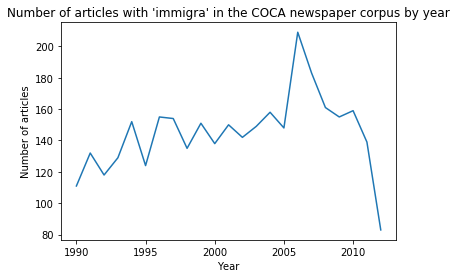

In [23]:
# Number of articles over time
years = range(1990,2013)

plt.plot(years, data.groupby('year').size())
plt.ylabel('Number of articles')
plt.xlabel('Year')
plt.title("Number of articles with 'immigra' in the COCA newspaper corpus by year")

Text(0.5, 1.0, "Percentage of articles with 'immigra' in the COCA newspaper corpus by year")

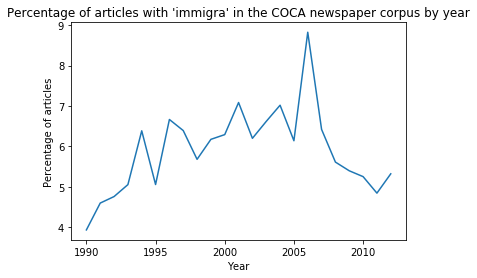

In [24]:
# Percentage of articles over time
plt.plot(years, data.groupby('year').size()/all_merged_df.groupby('year').size()*100)
plt.ylabel('Percentage of articles')
plt.xlabel('Year')
plt.title("Percentage of articles with 'immigra' in the COCA newspaper corpus by year")

In [25]:
# Number of unique sources over time
unique_source = []
for yr in range(1990,2013):
    yr = str(yr)
    yearly = data[data['year']==yr]
    unique_source.append(len(yearly['source'].unique()))

In [26]:
unique_source[:5]

[6, 7, 9, 9, 10]

In [27]:
data['source'].unique()
# 10 in total

array(['NYTimes', 'CSMonitor', 'AssocPress', 'USAToday', 'WashPost',
       'SanFranChron', 'Atlanta', 'Houston', 'Chicago', 'Denver'],
      dtype=object)

Text(0.5, 1.0, "Number of unique news sources with 'immigra' in the COCA newspaper corpus by year")

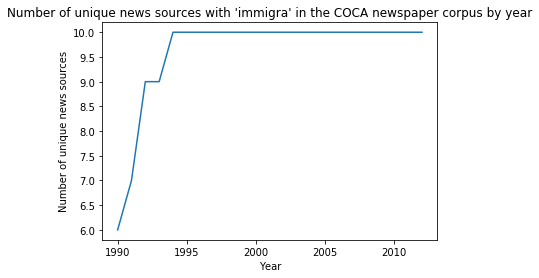

In [28]:
plt.plot(years, unique_source)
plt.ylabel('Number of unique news sources')
plt.xlabel('Year')
plt.title("Number of unique news sources with 'immigra' in the COCA newspaper corpus by year")

In [34]:
data['word_count'] = data['word_count'].apply(int)

In [35]:
# average word count
data['word_count'].sum() / len(data)

1817.0266866566717

In [36]:
print(data['word_count'].min(), data['word_count'].max())

714 39784


In [37]:
word_count = []
for yr in range(1990,2013):
    yr = str(yr)
    yearly = data[data['year']==yr]
    word_count.append(yearly['word_count'].sum() / len(yearly))

Text(0.5, 1.0, "Average word count of newspaper articles with 'immigra' in the COCA newspaper corpus by year")

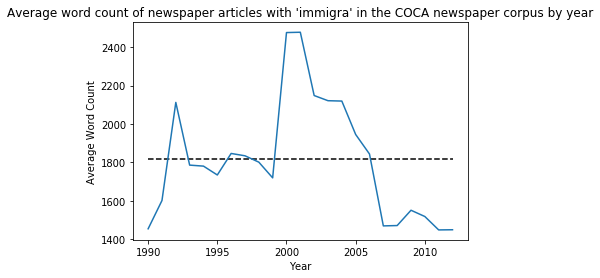

In [39]:
plt.plot(years, word_count)
# plot average of sample
plt.hlines(data['word_count'].sum() / len(data), 1990,2012, linestyles='dashed')
plt.ylabel('Average Word Count')
plt.xlabel('Year')
plt.title("Average word count of newspaper articles with 'immigra' in the COCA newspaper corpus by year")